# Californian Housing Market




In Sklearn, there are datasets that are already pre-recorded that we can use for our purposes to apply Machine Learning algorithms. Let's try to look at the first one with Californian Housing Market.

1. Import the usual librairies

In [2]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport

# Graphics

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Preprocessing 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Model Selection & evaluation

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'
pio.renderers.default = "notebook"

2. Use the following lines of code to retrieve California real estate price data:

In [3]:
data = pd.read_csv('C:/Users/LN/Documents/Formations/Jedha/5. Supervised Machine Learning/california_housing_market.csv')

In [4]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [34]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)    
data = np.c_[california_housing.data, california_housing.target]
columns = np.append(california_housing.feature_names, ["target"])
dataset = pd.DataFrame(data, columns=columns)

3. Use ONE line of code to get the names of the different explanatory variables.

In [7]:
dataset.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

4. We'd prefer to have this data in a DataFrame. Use the Pandas library to find a way to put this data into a DataFrame. 

You can go more specifically look at the following link: 

[DataFrame en Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [8]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

5. Visualize the impact of each variable on price with Plotly

a. Make a scatterplot to display the _Price_ as a function of _MedInc_.

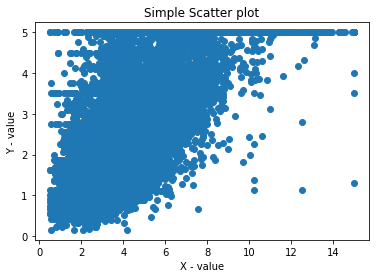

In [9]:
plt.scatter(x = dataset.MedInc, y = dataset.target)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('MedInc')
plt.ylabel('Price - Target')
plt.show()

b. Now look at the influence of the age of the house in relation to the price.

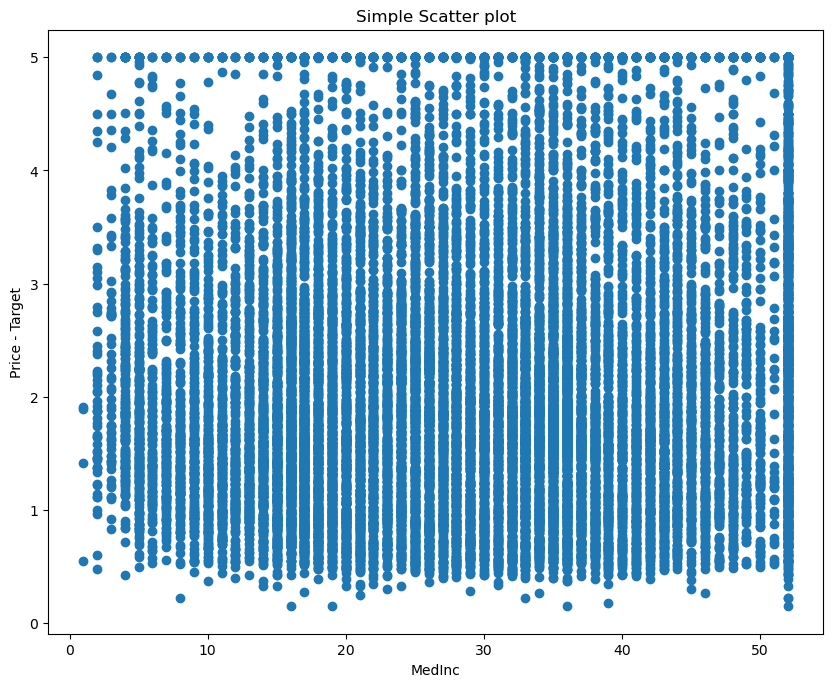

In [10]:
plt.scatter(x = dataset.HouseAge, y = dataset.target)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('MedInc')
plt.ylabel('Price - Target')
plt.show()

In [21]:
# Visualize average Price vs. HouseAge

df = dataset.groupby('HouseAge').mean().reset_index()
df.head()

,HouseAge,MedInc,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,1.0,4.003400,9.088091,1.552106,328.500000,3.244088,36.205000,-119.457500,1.443000
1,2.0,5.167766,7.649087,1.273514,2083.051724,2.747802,35.494483,-119.121379,2.244759
2,3.0,5.460258,6.851805,1.192486,3001.774194,2.734708,35.284516,-118.936452,2.356436
3,4.0,5.180673,6.112610,1.116190,2813.162304,2.786138,34.966963,-118.814293,2.292351
4,5.0,4.697636,5.963211,1.128014,2471.381148,3.279108,35.234262,-118.918033,2.084177


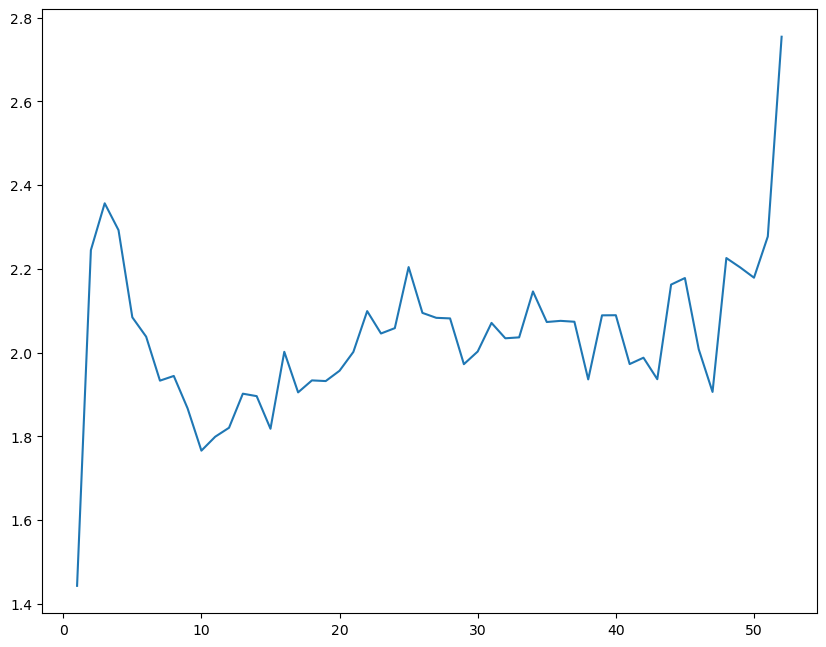

In [22]:

fig = plt.figure()
ax = plt.axes()
ax.plot(df.HouseAge, df.target);

c. Find a way to look at the trend between _AveRooms_ & _Price_.

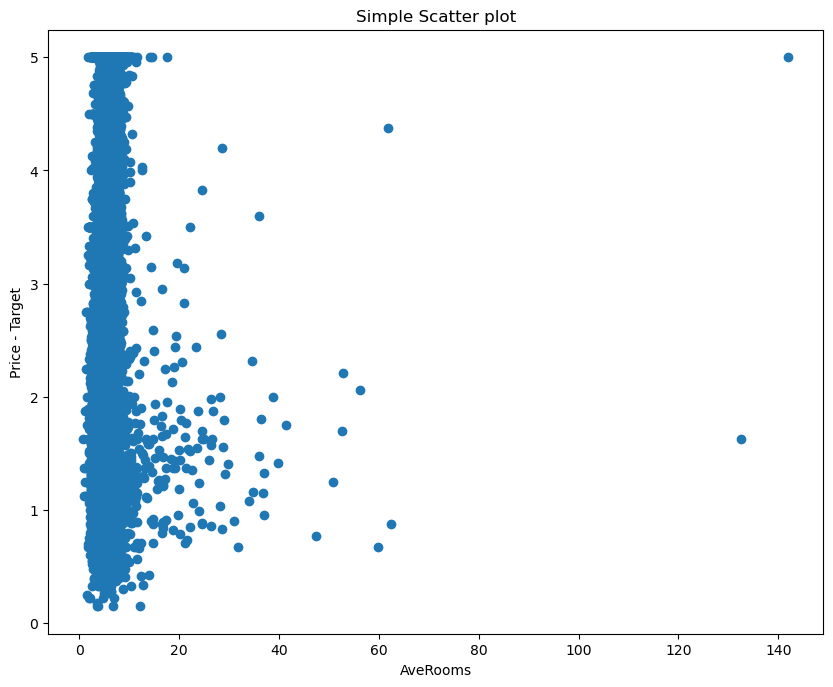

In [24]:
plt.scatter(x = dataset.AveRooms, y = dataset.target)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('AveRooms')
plt.ylabel('Price - Target')
plt.show()

In [26]:
fig = go.Figure()
fig.add_scatter(y=dataset['target'], x=dataset['AveRooms'], mode = 'markers')
fig.update_layout(width=1200,height=600)


In [35]:
# Remove outliers 
dataset = dataset.drop(dataset[(dataset['AveRooms'] < dataset['AveRooms'].mean() - 3 * dataset['AveRooms'].std()) | 
                      (dataset['AveRooms'] > dataset['AveRooms'].mean() + 3 * dataset['AveRooms'].std())].index)
fig = go.Figure()
fig.add_scatter(y=dataset['target'], x=dataset['AveRooms'], mode = 'markers')
fig.update_layout(width=1200,height=600)

d. Do the same with _AveBedrms_ & _Price_.

In [29]:
fig = go.Figure()
fig.add_scatter(y=dataset['target'], x=dataset['AveBedrms'], mode = 'markers')
fig.update_layout(width=1200,height=600)

In [37]:
# Remove outliers 
dataset = dataset.drop(dataset[(dataset['AveBedrms'] < dataset['AveBedrms'].mean() - 3 * dataset['AveBedrms'].std()) | 
                      (dataset['AveBedrms'] > dataset['AveBedrms'].mean() + 3 * dataset['AveBedrms'].std())].index)
fig = go.Figure()
fig.add_scatter(y=dataset['target'], x=dataset['AveBedrms'], mode = 'markers')
fig.update_layout(width=1200,height=600)

e. Do the same with the population. Simply filter the dataset so that it contains only those values for which the population is less than 15,000.

In [31]:
fig = go.Figure()
fig.add_scatter(y=dataset['target'], x=dataset['Population'], mode = 'markers')
fig.update_layout(width=1200,height=600)

In [38]:
dataset = dataset.drop(dataset[dataset['Population'] >= 15000].index)
fig = go.Figure()
fig.add_scatter(y=dataset['target'], x=dataset['Population'], mode = 'markers')
fig.update_layout(width=1200,height=600)

f. Do the same with _AveOccup_. This time filter the column to keep only the values below 20%.

In [39]:
fig = go.Figure()
fig.add_scatter(y=dataset['target'], x=dataset['AveOccup'], mode = 'markers')
fig.update_layout(width=1200,height=600)

In [40]:
dataset = dataset.drop(dataset[dataset['AveOccup'] >= 20].index)
fig = go.Figure()
fig.add_scatter(y=dataset['target'], x=dataset['AveOccup'], mode = 'markers')
fig.update_layout(width=1200,height=600)

In [56]:
dataset = dataset.drop(dataset[dataset['target'] > 5].index)

6. Cut your dataset in half. You will have $X$ containing the explanatory variables and $y$ containing the target variable.

In [57]:
# Separate target variable Y from features X
features_list = [x for x in dataset.columns]
features_list.pop()
target_variable = "target"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

7. Now separate your dataset into a *train_set* and a *test_set*. We will use scikitlearn for this

In [58]:
# Divide dataset Train set & Test set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, 
                                                    random_state=0)

8. In your opinion, is there a need for a standardisation phase? If so, do it via scikitlearn.

In [59]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()

# Normalization
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

9. Create your linear regression model via scikit learn

In [60]:
# Train model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

10. Display your R2 score via scikitlearn on your test data. Comment on your score results.

In [61]:
X_test = scaler.transform(X_test)


In [62]:

Y_test_pred = regressor.predict(X_test)

In [63]:
r2_score(Y_test, Y_test_pred)

0.6576245922308392

In [66]:
Y_train_pred = regressor.predict(X_train)
r2_score(Y_train, Y_train_pred)

0.6230877615226962

In [53]:
fig = go.Figure()
fig.add_scatter(y=Y_test_pred, x=Y_test, mode = 'markers')
fig.update_layout(width=1200,height=600)

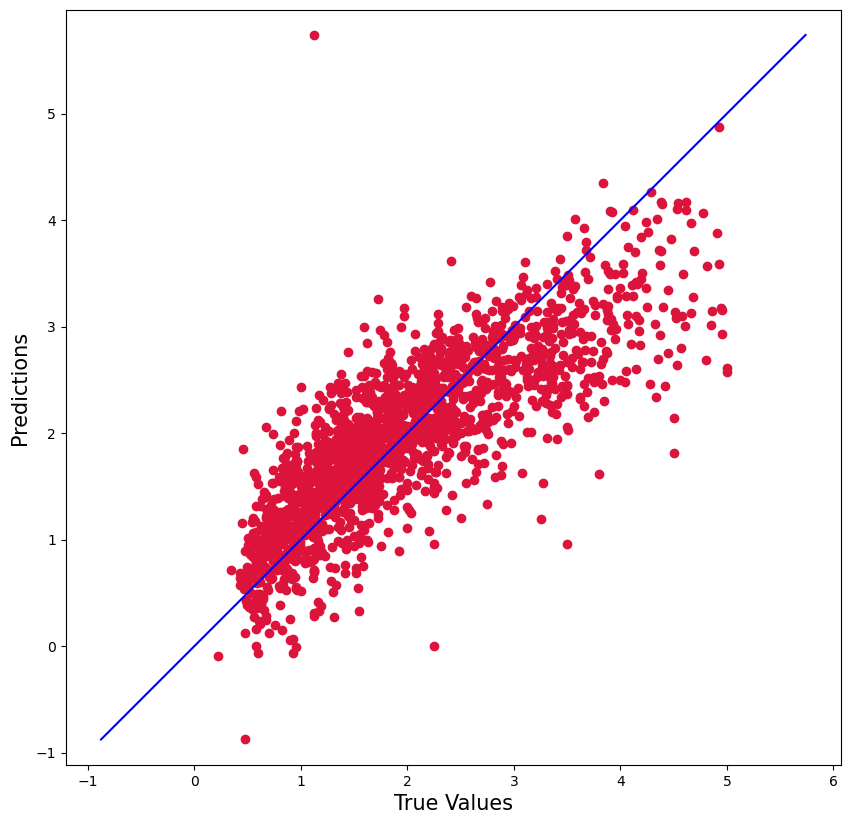

In [64]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_test_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(Y_test_pred), max(Y_test))
p2 = min(min(Y_test_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


In [55]:
# Print Adjusted R^2 scores
# n = number of observation, p = number of features

ntrain = len(Y_train)
ntest = len(Y_test)
p = X_test.shape[1]

r2train = r2_score(Y_train, Y_train_pred)
Adj_r2train = 1-(1-r2train)*(ntrain-1)/(ntrain-p-1)

r2test = r2_score(Y_test, Y_test_pred)
Adj_r2test = 1-(1-r2test)*(ntest-1)/(ntest-p-1)

print("Adjusted R2 score on training set : "+str(Adj_r2train))
print("Adjusted R2 score on test set : "+str(Adj_r2test))


Adjusted R2 score on training set : 0.6607329556441005
Adjusted R2 score on test set : 0.6750828680916665


In [72]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))


R2 score on training set :  0.6230877615226962
R2 score on test set :  0.6576245922308392


In [73]:
# Print R^2 scores
print("R2 score on training set : ", mean_squared_error(Y_train, Y_train_pred))
print("R2 score on test set : ", mean_squared_error(Y_test, Y_test_pred))


R2 score on training set :  0.35755538430149925
R2 score on test set :  0.3261818088349829


The model is just right : no overfitting, and the R2 score is significantly > 0 so we are performing way better than a "dummy" model

11. Display the coefficients of each of the explanatory variables

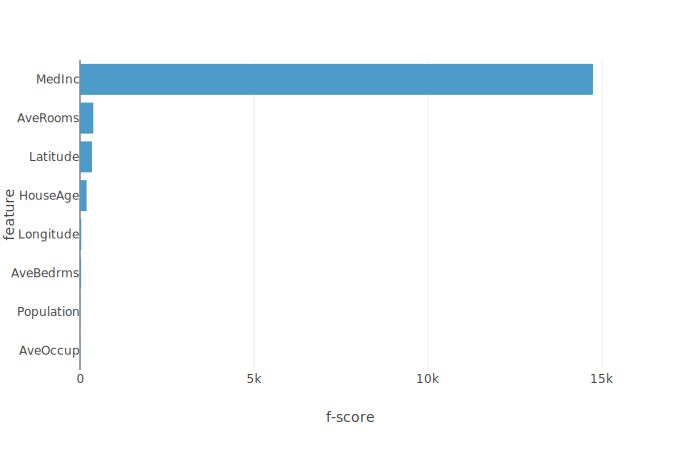

In [68]:
print(regressor.coef_)

[ 0.70857754  0.1252876  -0.16113023  0.10183019  0.03767288 -0.19248371
 -0.83448442 -0.79240292]


12. Create a DataFrame in which you will have the columns that refer to the right coefficient

In [71]:
coef_table = pd.DataFrame(list(X.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",regressor.coef_.transpose())
coef_table

,0,Coefs
0,MedInc,0.708578
1,HouseAge,0.125288
2,AveRooms,-0.161130
3,AveBedrms,0.101830
4,Population,0.037673
5,AveOccup,-0.192484
6,Latitude,-0.834484
7,Longitude,-0.792403


13. Now compute the **absolute value** of each coefficient and order them in descending order. What can you conclude now? 

,coefficients
Latitude,0.885875
Longitude,0.855442
MedInc,0.825102
AveBedrms,0.301116
AveRooms,0.265063
HouseAge,0.116986
AveOccup,0.040029
Population,0.006465


---> The most influential columns are Latitude, Longitude, MedInc and the number of beds.

14. In general, one avoids looking at the coefficients to determine the importance of features. Instead, we'll use something other than "f_regression".

Look at the documentation of sckitlearn to try to succeed in setting up this metric.

Feature: 0, Score: 0.70858
Feature: 1, Score: 0.12529
Feature: 2, Score: -0.16113
Feature: 3, Score: 0.10183
Feature: 4, Score: 0.03767
Feature: 5, Score: -0.19248
Feature: 6, Score: -0.83448
Feature: 7, Score: -0.79240


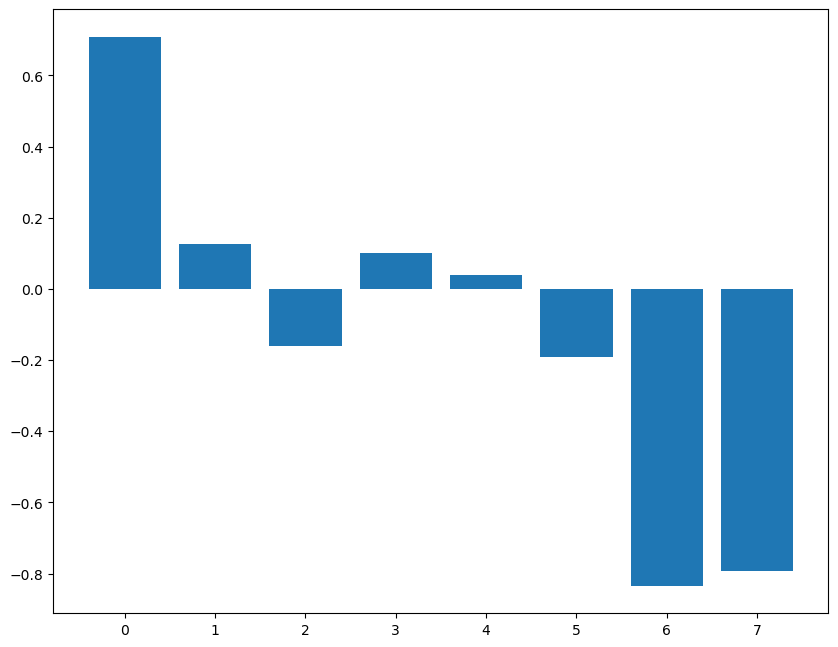

In [75]:
from matplotlib import pyplot
# get importance
importance = regressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature 0: 11914.349322
Feature 1: 62.912878
Feature 2: 1556.286736
Feature 3: 159.202445
Feature 4: 0.189264
Feature 5: 1066.725539
Feature 6: 311.720053
Feature 7: 46.467803


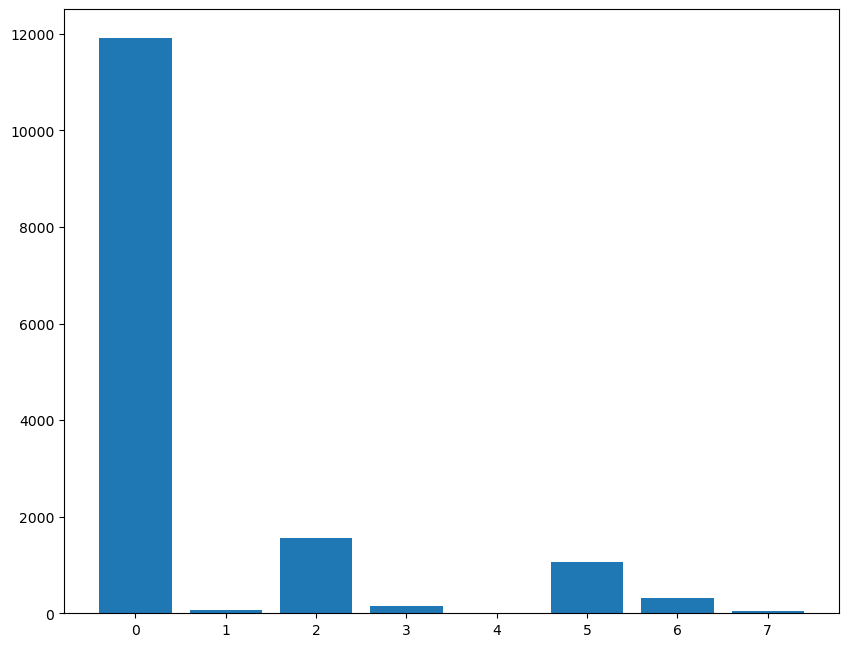

In [80]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, Y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

15. Then put your results in a dataframe so that they can be interpreted.

In [86]:
fs.pvalues_
fs.scores_

array([1.19143493e+04, 6.29128778e+01, 1.55628674e+03, 1.59202445e+02,
       1.89263949e-01, 1.06672554e+03, 3.11720053e+02, 4.64678028e+01])

In [92]:
pd.DataFrame({'Features': X.columns, 'p_values': fs.pvalues_, 'f values': fs.scores_}, columns=['Features', 'p_values', 'f values'])

,Features,p_values,f values
0,MedInc,0.000000e+00,11914.349322
1,HouseAge,2.294506e-15,62.912878
2,AveRooms,0.000000e+00,1556.286736
3,AveBedrms,2.463162e-36,159.202445
4,Population,6.635355e-01,0.189264
5,AveOccup,5.891038e-227,1066.725539
6,Latitude,3.838849e-69,311.720053
7,Longitude,9.627943e-12,46.467803


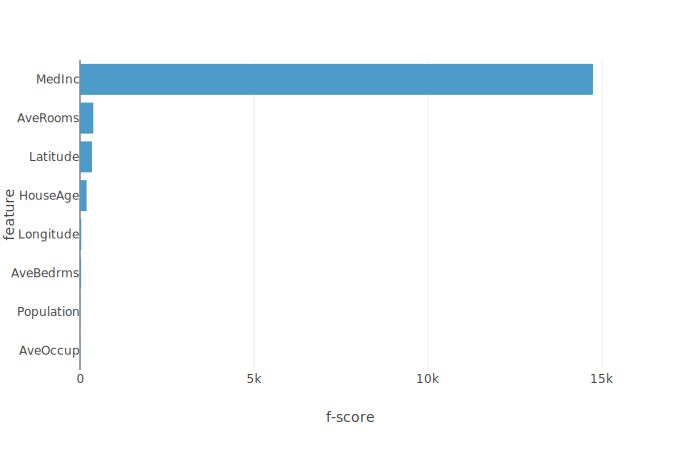

---> Here we see that the ranking of the features is slightly different. It is on this f-score that we will rely for the rest of the exercises.

## Bonus questions

16. Take a sample from your dataset via ``.sample()`` We will take 150 values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
5054,4.0357,44.0,6.232653,1.004082,608.0,2.481633,34.02,-118.34,1.878
16507,4.4213,11.0,7.345936,1.132325,1605.0,3.034026,37.74,-121.11,1.827
9368,5.0779,34.0,5.487179,0.990138,1219.0,2.404339,37.93,-122.52,3.339
1791,1.7500,45.0,4.205607,1.009346,1798.0,2.400534,37.93,-122.37,0.379
11011,7.0565,32.0,7.212500,0.940625,967.0,3.021875,33.77,-117.82,3.246


17. Reset the indexes to have a sequence of numbers between 0 and the size of the dataset.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,4.0357,44.0,6.232653,1.004082,608.0,2.481633,34.02,-118.34,1.878
1,4.4213,11.0,7.345936,1.132325,1605.0,3.034026,37.74,-121.11,1.827
2,5.0779,34.0,5.487179,0.990138,1219.0,2.404339,37.93,-122.52,3.339
3,1.7500,45.0,4.205607,1.009346,1798.0,2.400534,37.93,-122.37,0.379
4,7.0565,32.0,7.212500,0.940625,967.0,3.021875,33.77,-117.82,3.246


18. Use the following help to translate the longitude and latitude of the data to find the cities corresponding to each observation: [geopy](https://pypi.org/project/geopy)

     |████████████████████████████████| 112 kB 7.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


{'shop': 'Steinecke',
 'road': 'Potsdamer Platz',
 'suburb': 'Tiergarten',
 'borough': 'Mitte',
 'city': 'Berlin',
 'state': 'Berlin',
 'postcode': '10785',
 'country': 'Deutschland',
 'country_code': 'de'}

{'house_number': '3696', 'road': 'Buckingham Road', 'suburb': 'Baldwin Hills/Crenshaw', 'city': 'Los Angeles', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '90016', 'country': 'United States', 'country_code': 'us'}
{'leisure': 'Spring Creek Golf & Country Club', 'house_number': '1580', 'road': 'Spring Creek Drive', 'town': 'Ripon', 'county': 'San Joaquin County', 'state': 'California', 'postcode': '95366', 'country': 'United States', 'country_code': 'us'}
{'house_number': '47', 'road': 'Lakeside Drive', 'village': 'Corte Madera', 'county': 'Marin County', 'state': 'California', 'postcode': '94925', 'country': 'United States', 'country_code': 'us'}
{'house_number': '129', 'road': 'South 1st Street', 'neighbourhood': 'Atchison Village', 'city': 'Richmond', 'county': 'Contra Costa County', 'state': 'California', 'postcode': '94801', 'country': 'United States', 'country_code': 'us'}
{'house_number': '13201', 'road': 'Prospect Avenue', 'suburb': 'North Tustin', 'county

{'building': 'Village Apartments', 'road': 'South 5th Street', 'neighbourhood': 'SoFA', 'city': 'San Jose', 'county': 'Santa Clara County', 'state': 'California', 'postcode': '95192', 'country': 'United States', 'country_code': 'us'}
{'house_number': '884', 'road': 'Pierino Avenue', 'city': 'Sunnyvale', 'county': 'Santa Clara County', 'state': 'California', 'postcode': '94086', 'country': 'United States', 'country_code': 'us'}
{'house_number': '8624', 'road': 'Seneca Street', 'city': 'Oakland', 'county': 'Alameda County', 'state': 'California', 'postcode': '2952', 'country': 'United States', 'country_code': 'us'}
{'house_number': '7501', 'road': 'Hall Road', 'county': 'Tehama County', 'state': 'California', 'postcode': '96021', 'country': 'United States', 'country_code': 'us'}
{'house_number': '9855', 'road': '18th Avenue', 'town': 'Lemoore', 'county': 'Kings County', 'state': 'California', 'postcode': '93245', 'country': 'United States', 'country_code': 'us'}
{'house_number': '3131', 

{'house_number': '1009', 'road': 'East Ruddock Street', 'town': 'Covina', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '91724', 'country': 'United States', 'country_code': 'us'}
{'house_number': '3898', 'road': 'Stagecoach Road', 'county': 'Calaveras County', 'state': 'California', 'postcode': '95228', 'country': 'United States', 'country_code': 'us'}
{'road': 'Martin Luther King Junior Boulevard', 'suburb': 'Baldwin Hills/Crenshaw', 'city': 'Los Angeles', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '90016', 'country': 'United States', 'country_code': 'us'}
{'house_number': '3591', 'road': 'Lois Canyon Road', 'county': 'San Diego County', 'state': 'California', 'postcode': '91935', 'country': 'United States', 'country_code': 'us'}
{'city': 'Pomona', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '91766', 'country': 'United States', 'country_code': 'us'}
{'amenity': 'Santa Fe High School', 'road': 'Jersey Avenue', 'suburb'

{'house_number': '1943', 'road': 'Mendocino Street', 'neighbourhood': 'Richmond Annex', 'city': 'Richmond', 'county': 'Contra Costa County', 'state': 'California', 'postcode': '94804', 'country': 'United States', 'country_code': 'us'}
{'house_number': '35826', 'road': 'Avenue 13 1/4', 'county': 'Madera County', 'state': 'California', 'postcode': '93636', 'country': 'United States', 'country_code': 'us'}
{'house_number': '4022', 'road': '25th Street', 'neighbourhood': 'Noe Valley', 'city': 'San Francisco', 'county': 'San Francisco', 'state': 'California', 'postcode': '94110', 'country': 'United States', 'country_code': 'us'}
{'house_number': '712', 'road': '19th Street', 'city': 'Sacramento', 'county': 'Sacramento County', 'state': 'California', 'postcode': '95811', 'country': 'United States', 'country_code': 'us'}
{'house_number': '3788', 'road': 'Randolph Avenue', 'neighbourhood': 'Baird Park', 'city': 'Los Angeles', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '

19. If there are cities that you have not found, replace the value in the cell with ```unknown```.

21. Redo a linear regression model by including cities as explanatory variables. What score do you find?

In [38]:
# OHE of cities 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,City_Arcadia,...,City_Thousand Oaks,City_Torrance,City_Tustin,City_Unknown,City_Vallejo,City_Walnut Creek,City_Watsonville,City_West Covina,City_West Hollywood,City_Yorba Linda
0,3.6974,40.0,4.841130,1.096205,2034.0,1.795234,34.11,-118.34,5.00001,0,...,0,0,0,0,0,0,0,0,0,0
1,3.7361,35.0,5.734848,1.143939,474.0,3.590909,33.93,-118.16,1.79800,0,...,0,0,0,0,0,0,0,0,0,0
2,10.7569,52.0,7.450617,0.938272,465.0,2.870370,37.75,-122.46,5.00001,0,...,0,0,0,0,0,0,0,0,0,0
3,4.2865,38.0,5.757256,1.079156,1141.0,3.010554,34.19,-118.51,2.21100,0,...,0,0,0,0,0,0,0,0,0,0
4,3.3534,26.0,6.087097,1.154839,1913.0,3.085484,34.13,-117.24,0.98900,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Separate variables

In [40]:
# Train Test Split

In [41]:
# Normalize variables

In [42]:
# Train model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Evaluate R2 on train set

0.8378675371625773

In [44]:
# Evaluate R2 on test set

-5.896056016234598e+26

22. Our model is generally not as good. Why do you think that is? 

----> We have much less data. We'd have to take a bigger sample for our model to have enough to train properly. 